In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [2]:
%cd sample_data

[WinError 2] The system cannot find the file specified: 'sample_data'
C:\Users\Rinith\AI PROJECT


In [3]:
match_df = pd.read_csv("match.csv")

In [4]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


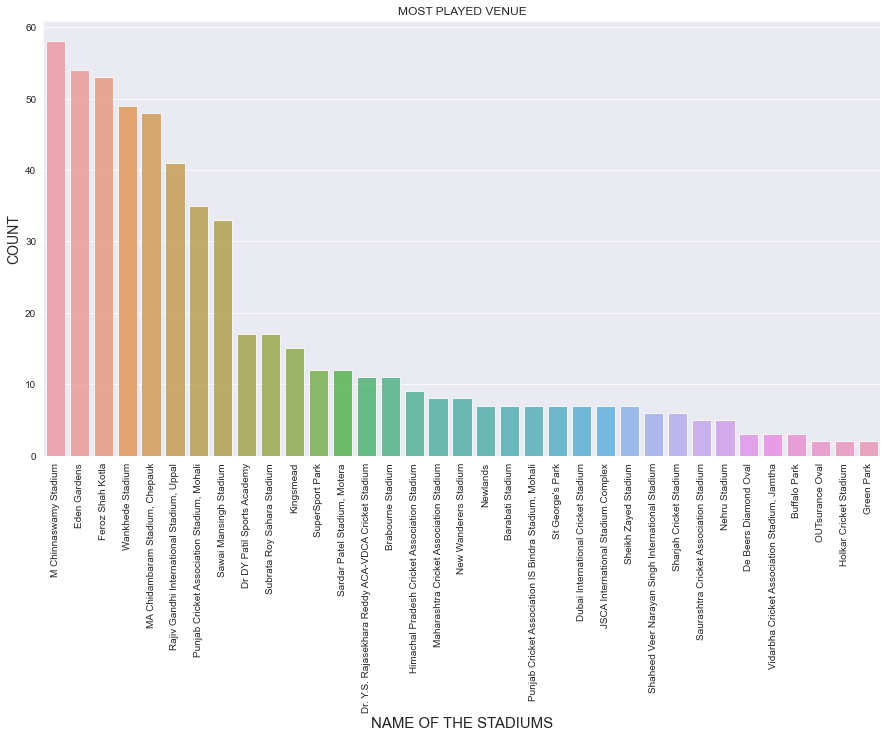

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style("darkgrid")
ls=match_df['venue'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.title('MOST PLAYED VENUE')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('NAME OF THE STADIUMS', fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

In [6]:
deliveries_df = pd.read_csv("deliveries.csv")
deliveries_df.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [7]:
team_score = deliveries_df.groupby(['match_id', 'inning'])['total_runs'].sum().unstack().reset_index()
team_score.columns = ['match_id', 'Team1_score', 'Team2_score', 'Team1_superover_score', 'Team2_superover_score']
matches_agg = pd.merge(match_df, team_score, left_on = 'id', right_on = 'match_id', how = 'outer')

team_extras = deliveries_df.groupby(['match_id', 'inning'])['extra_runs'].sum().unstack().reset_index()
team_extras.columns = ['match_id', 'Team1_extras', 'Team2_extras', 'Team1_superover_extras', 'Team2_superover_extras']
matches_agg = pd.merge(matches_agg, team_extras, on = 'match_id', how = 'outer')

#Reorder the columns to make the data more readable
cols = ['match_id', 'season','city','date','team1','team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'Team1_score','Team2_score', 'win_by_runs', 'win_by_wickets', 'Team1_extras', 'Team2_extras', 'Team1_superover_score', 'Team2_superover_score', 'Team1_superover_extras', 'Team2_superover_extras', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']
matches_agg = matches_agg[cols]
matches_agg.head(2)

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,Team2_extras,Team1_superover_score,Team2_superover_score,Team1_superover_extras,Team2_superover_extras,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,19.0,NaN,NaN,NaN,NaN,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,...,11.0,NaN,NaN,NaN,NaN,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


<AxesSubplot:>

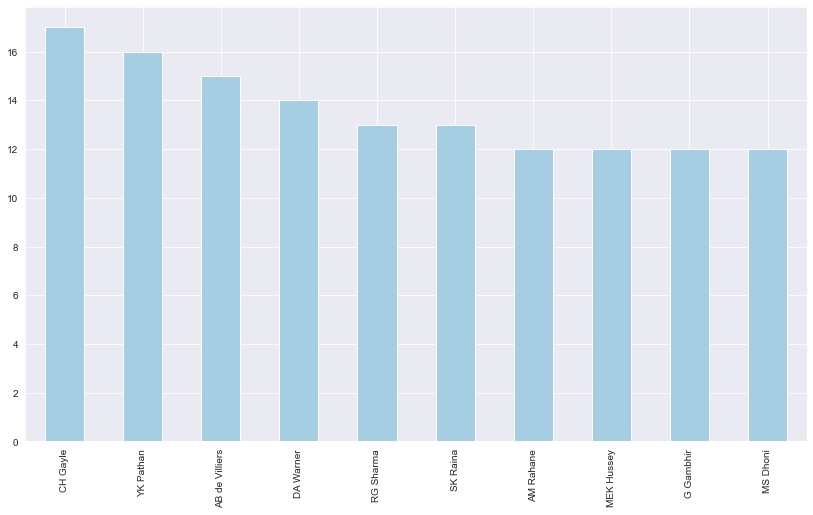

In [9]:
match_df['player_of_match'].value_counts()[:10].plot(kind = 'bar')

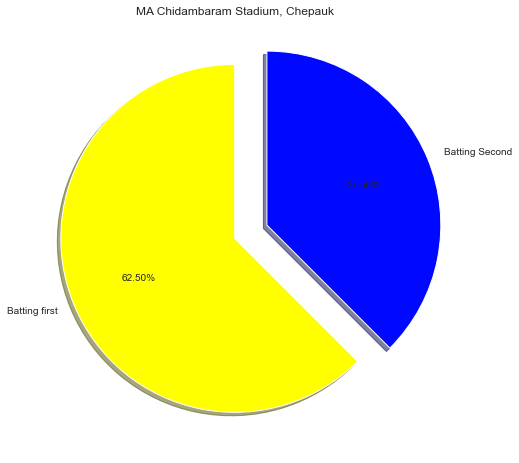

In [37]:
Chennai_stadium=match_df.loc[(match_df['venue']=='MA Chidambaram Stadium, Chepauk') ]
Chennai_stadium_win_by_runs=Chennai_stadium[Chennai_stadium['win_by_runs']>0]
slices=[len(Chennai_stadium_win_by_runs),len(Chennai_stadium)-len(Chennai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.2),autopct='%4.2f%%',colors=['#FFFF00','#0008FF'])
plt.title('MA Chidambaram Stadium, Chepauk')
plt.show()

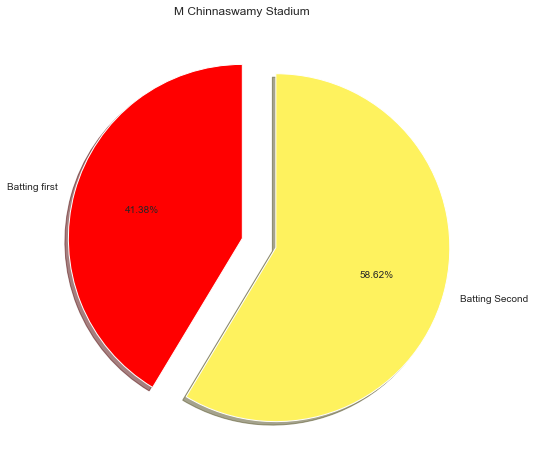

In [44]:
Bangalore_stadium=match_df.loc[(match_df['venue']=='M Chinnaswamy Stadium') ]
Bangalore_stadium_win_by_runs=Bangalore_stadium[Bangalore_stadium['win_by_runs']>0]
slices=[len(Bangalore_stadium_win_by_runs),len(Bangalore_stadium)-len(Bangalore_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.2),autopct='%4.2f%%',colors=['#FF0000','#FEF25E'])
plt.title('M Chinnaswamy Stadium')
plt.show()

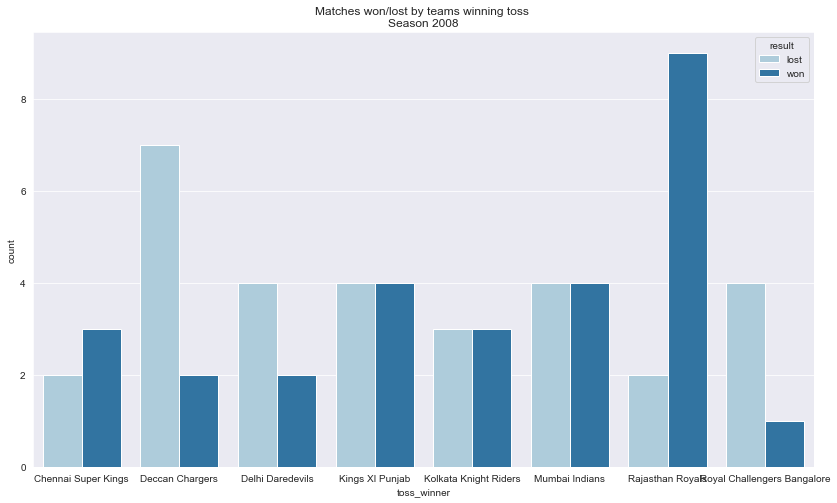

In [45]:
toss = matches_agg.groupby(['season', 'toss_winner']).winner.value_counts().reset_index(name = 'count')
toss['result'] = np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result = toss.groupby(['season', 'toss_winner','result'])['count'].sum().reset_index()
toss_result_x = toss_result[toss_result['season'] == 2008]
plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
plot.set_title('Matches won/lost by teams winning toss \nSeason ' +str(2008))
plt.show()


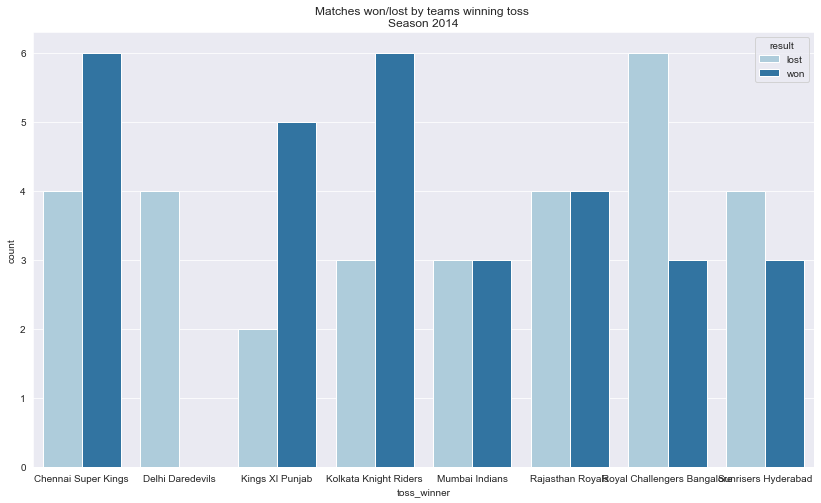

In [46]:
toss = matches_agg.groupby(['season', 'toss_winner']).winner.value_counts().reset_index(name = 'count')
toss['result'] = np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result = toss.groupby(['season', 'toss_winner','result'])['count'].sum().reset_index()
toss_result_x = toss_result[toss_result['season'] == 2014]
plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
plot.set_title('Matches won/lost by teams winning toss \nSeason ' +str(2014))
plt.show()

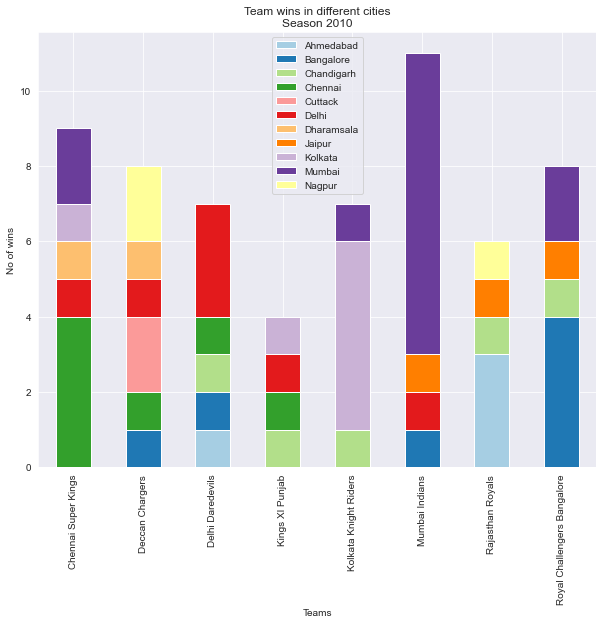

In [51]:
wins_percity = matches_agg[matches_agg['season'] == 2010].groupby(['winner', 'city'])['match_id'].count().unstack()
plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(2010), figsize=(10, 8))
sns.set_palette("Paired", len(matches_agg['city'].unique()))
plot.set_xlabel("Teams")
plot.set_ylabel("No of wins")
plot.legend(loc='best', prop={'size':10})

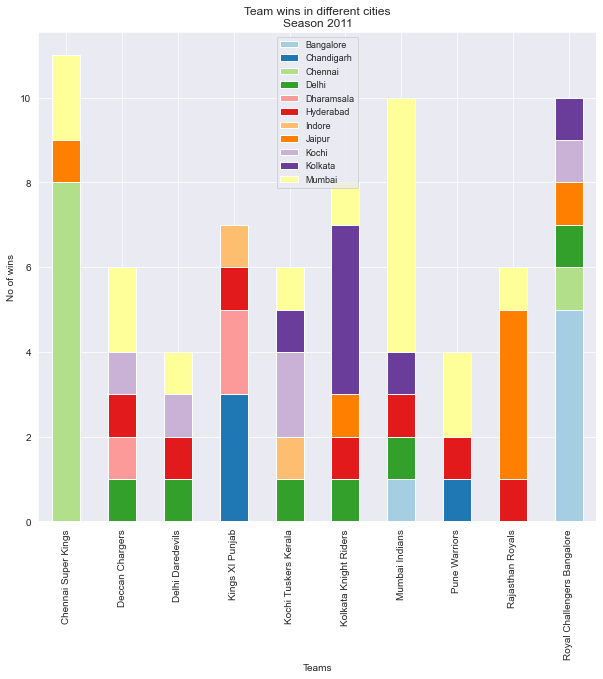

In [56]:
wins_percity = matches_agg[matches_agg['season'] == 2011].groupby(['winner', 'city'])['match_id'].count().unstack()
plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(2011), figsize=(10, 9))
sns.set_palette("Paired", len(matches_agg['city'].unique()))
plot.set_xlabel("Teams")
plot.set_ylabel("No of wins")
plot.legend(loc='best', prop={'size':9})